In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
trainX.shape, trainY.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
testX.shape, testY.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
cifar10.load_data

<function keras.src.datasets.cifar10.load_data()>

In [6]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [7]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=trainX, y=trainY, epochs=200, batch_size=20000, verbose=1)

Epoch 1/200
3/3 [==============================] - 24s 4s/step - loss: 2.3036 - accuracy: 0.1069
Epoch 2/200
3/3 [==============================] - 1s 298ms/step - loss: 2.2966 - accuracy: 0.1005
Epoch 3/200
3/3 [==============================] - 1s 300ms/step - loss: 2.2835 - accuracy: 0.1232
Epoch 4/200
3/3 [==============================] - 1s 306ms/step - loss: 2.2555 - accuracy: 0.1756
Epoch 5/200
3/3 [==============================] - 1s 303ms/step - loss: 2.2203 - accuracy: 0.1827
Epoch 6/200
3/3 [==============================] - 1s 304ms/step - loss: 2.1850 - accuracy: 0.1969
Epoch 7/200
3/3 [==============================] - 1s 314ms/step - loss: 2.1448 - accuracy: 0.2266
Epoch 8/200
3/3 [==============================] - 1s 326ms/step - loss: 2.1082 - accuracy: 0.2347
Epoch 9/200
3/3 [==============================] - 1s 349ms/step - loss: 2.0722 - accuracy: 0.2502
Epoch 10/200
3/3 [==============================] - 1s 352ms/step - loss: 2.0391 - accuracy: 0.2578
Epoch 11/20

In [13]:
model.fit(x=trainX, y=trainY, epochs=500, batch_size=5000, verbose=1)

Epoch 1/500
10/10 [==============================] - 5s 119ms/step - loss: 1.0701 - accuracy: 0.6190
Epoch 2/500
10/10 [==============================] - 1s 121ms/step - loss: 1.0736 - accuracy: 0.6197
Epoch 3/500
10/10 [==============================] - 1s 104ms/step - loss: 1.0530 - accuracy: 0.6283
Epoch 4/500
10/10 [==============================] - 1s 104ms/step - loss: 1.0594 - accuracy: 0.6255
Epoch 5/500
10/10 [==============================] - 1s 104ms/step - loss: 1.0350 - accuracy: 0.6324
Epoch 6/500
10/10 [==============================] - 1s 104ms/step - loss: 1.0426 - accuracy: 0.6294
Epoch 7/500
10/10 [==============================] - 1s 102ms/step - loss: 1.0671 - accuracy: 0.6255
Epoch 8/500
10/10 [==============================] - 1s 103ms/step - loss: 1.0852 - accuracy: 0.6187
Epoch 9/500
10/10 [==============================] - 1s 101ms/step - loss: 1.0401 - accuracy: 0.6333
Epoch 10/500
10/10 [==============================] - 1s 101ms/step - loss: 1.0234 - accura

In [15]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()

# with context manager probably means we do not have to call json_file.close() method here
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

  model.save_weights('model.h5')

In [16]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [17]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [18]:
# to train model afresh can use loaded_model.compiie(), or simply use pretrained model weights

loaded_model.load_weights('model.h5')

In [19]:
p = loaded_model.predict(testX)

313/313 [==============================] - 1s 2ms/step


In [20]:
import numpy as np
import pandas as pd

labels_test_predicted = np.argmax(p, 1)

labels_test_predicted

array([3, 8, 9, ..., 5, 1, 7])

In [21]:
pd.crosstab(np.argmax(testY, axis=1), labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,717,16,68,23,31,13,17,21,54,40
1,21,748,8,10,7,4,20,13,25,144
2,55,9,575,70,69,66,71,62,14,9
3,20,5,68,471,65,191,83,67,13,17
4,12,4,82,69,609,51,69,89,10,5
5,14,2,60,146,35,617,36,75,4,11
6,7,2,58,63,38,23,786,13,3,7
7,19,1,25,22,46,67,10,792,1,17
8,62,33,21,25,7,6,6,9,787,44


In [22]:
(trX, trY), (teX, teY) = cifar10.load_data()

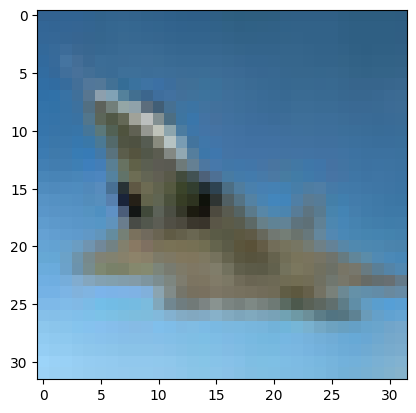

In [23]:
import matplotlib.pyplot as plt

ind = 7102
sample_image = teX[ind,:,:,:]

pixels = sample_image.reshape((32,32,3))
plt.imshow(pixels,cmap='gray')
plt.show()

In [25]:
print('real label', np.argmax(teY[ind]))
print('predicted label', np.argmax(labels_test_predicted[ind]))

real label 0
predicted label 0
